# Data Science FAQ

> ![](http://www.seppo.net/cartoons/albums/cartoons/nature/nature_others/normal_dataevolution_e.jpg)

## Introduction

I remember being extremely confused about where and how to get started with Data Science. Should I continue using Python, a language I was comfortable with from a web development context, or should I learn the R package? Which blogs should I follow to get the best up-to-date content? How useful are MOOCs available on platforms such as edX and Coursera? Which ML algorithms and techniques tend to perform best in Kaggle Competitions? 

Unfortunately, there aren't any objective answers to these questions. A hardcore data engineer will swear by the Python language whereas a statistician is more likely to prefer R. However, what we can do is gain an understanding of the public opinion on these topics by collecting answers from diverse groups to the aforemewntioned questions. Fortunately for DS Beginners, Kaggle has given us just that; a treasure trove of data collected from over 15,000 budding and professional data scientists that give us an invaluable glimpse into their preferences, jobs, learning resources and technology stacks.

In this notebook, I will be using Kaggle's dataset to answer some of the questions that I had when I had started out learning Data Science. I will rely on the MCQ dataset more than the Freeform answers since they are more structured and will tend to contain answers that we expect. An important disclaimer I feel obliged to mention is that **this dataset, being a product of an online survey, is extremely prone to bias.** We will, however, not look too much into this unless absolutely required. We will also assume that the answers given is a good reflection of the opinions of the entire Data Science community in general.

## Loading Data and Libraries

In [3]:
#Render Matplotlib Plots Inline
%matplotlib inline

#Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#Import Plotly and use it in the Offline Mode
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as fig_fact
plotly.tools.set_config_file(world_readable=True, sharing='public')

#Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Load MCQ Responses into a Pandas DataFrame
mcq = pd.read_csv('/Users/vishwaprabhakarsingh/Documents/pythoncasestudies/kaggle-survey-2017/multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

In [5]:
#Load Free Form Responses into a Pandas DataFrame
ff = pd.read_csv('/Users/vishwaprabhakarsingh/Documents/pythoncasestudies/kaggle-survey-2017/freeformResponses.csv', encoding="ISO-8859-1", low_memory=False)
ff.shape

(16716, 62)

We have data from over **16,716 people**. There were over 228 MCQ questions and 62 Free Form Questions which people have answered. Since the number of questions is incredibly large (over 300 in total), it would not be reasonable to expect people to have answered all the questions. In other words, most of our data points are expected to be null.

## Survey Demographics

I have already stated in my introduction that I will not be looking too much into the biases brought about by an online survey. However, it is important that we understand the demographics of our respondents so that we are in a better position to interpret the results and not naively take them at face value.

### Gender

Let us first take a look into the gender balance of our respondents.

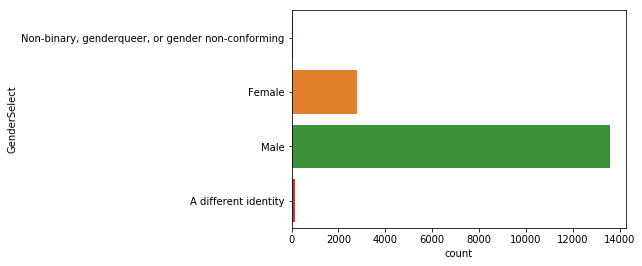

In [6]:
#The Seaborn Countplot function counts the number of instances of each category and renders a barplot.
sns.countplot(y='GenderSelect', data=mcq)

We see that **our respondents are overwhelmingly male.** This reflects a very acute problem in the world of Data Science, and of technology in general. The gender ratio is heavily skewed towards men. However, for the most of the questions answered in this notebook, I do not think there will be too much of a gender bias. So, we're good to go.

### Country

Different countries tend to have different preferences and trends when it comes to things such as technology stacks, age group and education levels of their data scientists. The big picture of the nationalities of our respondents should be able to give us an idea of country biases, if there are any.

In [7]:
#Create a DataFrame for number of respondents by country
con_df = pd.DataFrame(mcq['Country'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_resp', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(10)

num_resp                      country
0      4197                United States
1      2704                        India
2      1023                        Other
3       578                       Russia
4       535               United Kingdom
5       471  People 's Republic of China
6       465                       Brazil
7       460                      Germany
8       442                       France
9       440                       Canada

In [9]:
#Create a Choropleth Map of the respondents using Plotly. 
#Find out more at https://plot.ly/python/choropleth-maps/
data = [ dict(
        type = 'choropleth',
        locations = con_df['country'],
        locationmode = 'country names',
        z = con_df['num_resp'],
        text = con_df['country'],
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(56, 142, 60)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Survey Respondents'),
      ) ]

layout = dict(
    title = 'Survey Respondents by Nationality',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='survey-world-map')

The **United States** and **India** account for the most respondents and together represent more than one-third of the population. It is therefore expected that answers contained in the dataset will be more relevant and biased towards Americans and Indians. We will however not look too much into this and try to remove bias only when absolutely required (such as when considering salaries).

### Age

Next, let's take a look at the distribution of ages of our respondents.

In [7]:
#Get Summary Statistics of the Respndents' Ages.
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

In [10]:
#Plot the Age distribution
fig = fig_fact.create_distplot([mcq[mcq['Age'] > 0]['Age']], ['age'], colors=['#BA68C8'])
py.iplot(fig, filename='Basic Distplot')
#sns.distplot(mcq[mcq['Age'] > 0]['Age'])

Our respondents are relatively young with **more than 75% of the population being under 37 years of age.** The mean and median ages are 32 and 30 years respectively. The majority of our respondents fall in the 25-35 age bracket. 

### Level of Education

What level formal education have our respondents received? Let us have a look at the data to get our answer.

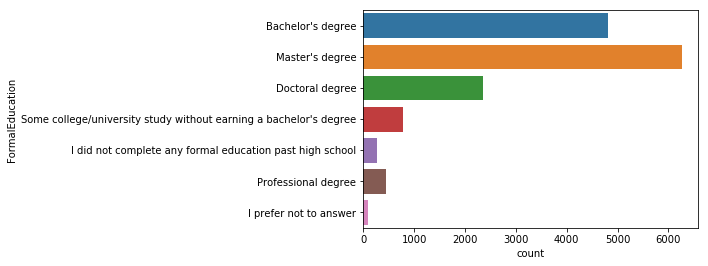

In [9]:
sns.countplot(y='FormalEducation', data=mcq)

A large fraction of our users have a **Master's Degree** which alludes the importance of formal education in the field of Data Science. **Bachelor's Degree** holders come in second. A considerable number of people also have a **Doctoral Degree** which, I suspect, is much higher than related fields such as Software Engineering or Web Development. 

### Undergraduate Major

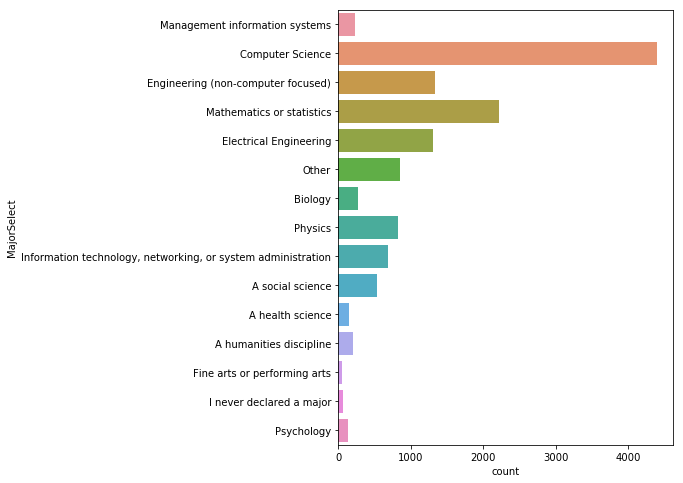

In [10]:
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data=mcq)

The majority of our respondents have their undergraduate majors in **Computer Science**, **Mathematics** or **Engineering**. Math and CS also happen to be the fields whose intersection is Data Science. That said, the number of majors reprsented in our dataset is fairly diverse with people coming in from all walks of life including humanities, fine arts and liberal arts.

### Employment Status

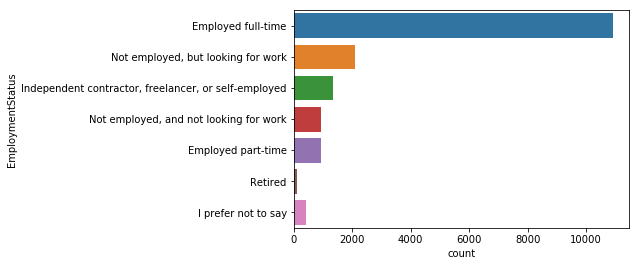

In [11]:
sns.countplot(y='EmploymentStatus', data=mcq)

A majority of our **respondents are employed full time.** This is a good thing as trends observed via this data will be a good indication of preferences and opinions that exist among Data Science Job Holders and as a result, can be reasonably well correlated with the prospect of getting a job in the field.

### Programming Experience

How experienced are our respondents with writing code in Data Science? The Tenure feature of our dataset can provide us answers to this question.

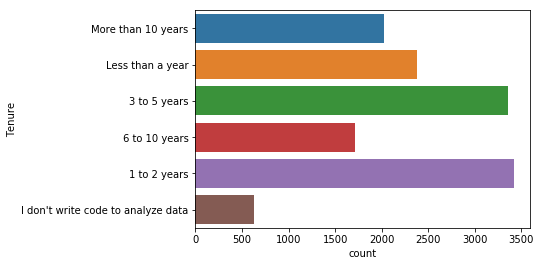

In [12]:
sns.countplot(y='Tenure', data=mcq)

Most of our respondents have less than 5 years of experience of writing code. **A considerable chunk have less than 2 years of experience writing code.** This information, coupled with what we've extracted in the previous subsection (most of our population is employed) suggests that you don't have to be too much of an expert in programming to break into the field of Data Science. 

## Frequently Asked Questions

We now have a good idea of the demographics of our population. Let us now proceed to the main section of the notebook and answer some of the most common questions asked by beginners in the field of Data Science.

### Q1. Which Language should I learn? Python or R?

One of the first and the most commonly asked questions about Data Science is Language Preference. **Python** and **R** are the two most ubiquitious languages in Data Science and both have their own communities of staunch supporters who swear by their respective languages. Let us take a look at what our respondents had to say.

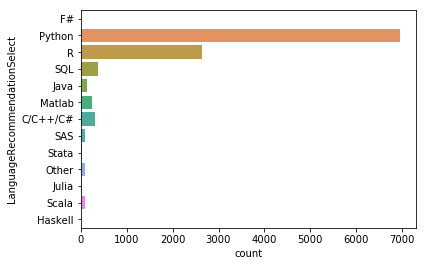

In [13]:
sns.countplot(y='LanguageRecommendationSelect', data=mcq)

**Python** seems to have clearly won the language preference race when it comes to overall preference. Let us dig a little deeper and see which jobs and indutries tend to prefer which languages.

#### Small Detour: Do Certain Age Groups Prefer Certain Languages?
This was a question asked by one of the commentors [Baptiste Garro](https://www.kaggle.com/baptistegarro). Let us see if this is the case.

In [11]:
top_lang = mcq['LanguageRecommendationSelect'].value_counts()
top_lang_dist = []
for lang in top_lang.index:
    top_lang_dist.append(mcq[(mcq['Age'].notnull()) & (mcq['LanguageRecommendationSelect'] == lang)]['Age'])

group_labels = top_lang.index

fig = fig_fact.create_distplot(top_lang_dist, group_labels, show_hist=False)
py.iplot(fig, filename='Language Preferences by Age')


We see that almost all our languages tend to have almost overlapping age distribution indicating little to no preference based on age. The only exceptions to this are the **Julia** Programming Language which happends to be moe popular with the more seasoned programmers (the mean age of Julia users is close to 35 years) and **Haskell**, which is more popular with the younger generation.

**End of Detour**

Next, I will check the preferenc by profession of two of the most popular data science languages, Python and R.

In [15]:
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

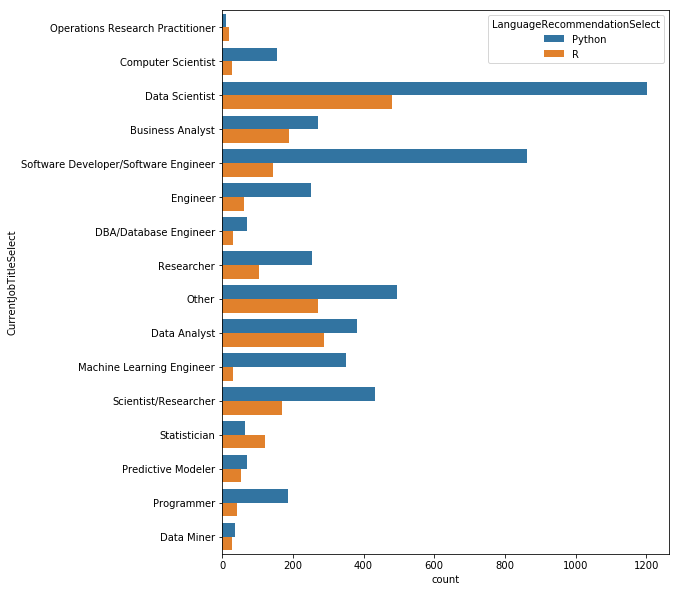

In [16]:
#Plot the number of R and Python users by Occupation
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & ((mcq['LanguageRecommendationSelect'] == 'Python') | (mcq['LanguageRecommendationSelect'] == 'R'))]
plt.figure(figsize=(8, 10))
sns.countplot(y="CurrentJobTitleSelect", hue="LanguageRecommendationSelect", data=data)

Almost all professions tend to prefer **Python** as their Language Recommendation of Choice. An important exception are the **Statisticians** who generally tend to prefer R. The only other profession that uses R more than Python is the **Operations Research Practitioner.**

#### General Verdict

Use R if you're a statistician and Python if you're anything else. 

#### Personal Opinion

Like the respondents of this survey, I too tend to prefer Python as my language of choice for Data Science. This is partially due to the fact that I come from a Web Development background where I extensively used the Django framework to build web applications. **The only area in which R continues to overshadow Python is Visualizations.** R's ggplot2 is, by far, the most powerful graphical library out there with no equal in Python. This, however, can be expected to change soon.

### Q2. What is the Next Big Thing in Data Science?

Data Science, easily one of the most exciting fields in the 21st Century, has a lot of buzzwords associated with it. Even people outside the field are sufficiently acquainted to terms such as *Big Data*, *Deep Learning* and *Neural Networks*. In this section, we will take a look at what our respondents think is going to be the most exciting technology in the next year.

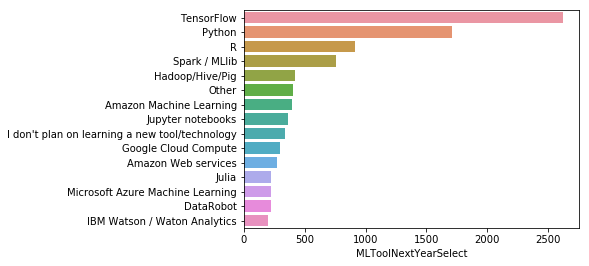

In [17]:
#Render a bar plot of the 15 most popular ML Tools for next year
data = mcq['MLToolNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

**TensorFlow** is the clear winner here. The Deep Learning framework from Google has gained a huge amount of popularity in the recent past due to its power and ease of use.

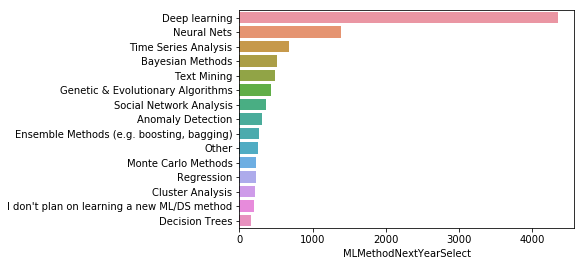

In [18]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

As far as DS Methods are concerned, the answers closely mirror what we obtained from DS Tools. **Deep Learning** and **Neural Nets** are the two most popular choices for Method of the Year 2018. An investment into learning these technologies (Neural Networks, Deep Learning and TensorFlow) can have huge benefits in the near future.

#### General Verdict

Deep Learning and TensorFlow.

### Q3. Where should I learn Data Science from?

Owing to its enornous popularity, there is really no shortage of the types and quantity of resources available to learn Data Science. In fact, beginners tend to be extremely overwhelmed by the huge amount of choices available to them. Should they do a course offered by a University? Or are Podcasts more practical? Are books reasonably well updated to be of any use?

To answer this question, again, let us look at what our respondents have to tell us.

In [19]:
#Explode the Pandas Dataframe to get the number of times each Learning Platform was mentioned
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x: pd.Series(x['LearningPlatformSelect']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'

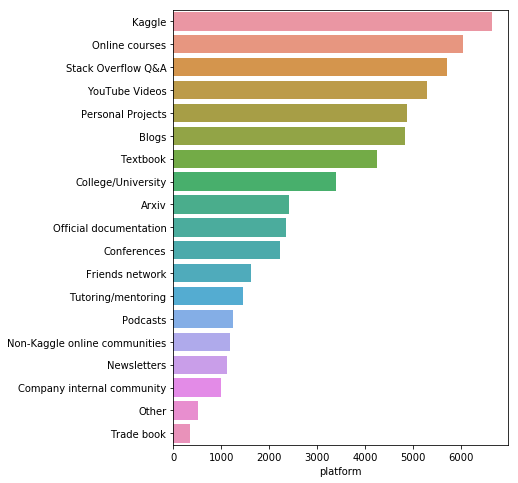

In [20]:
plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts()
sns.barplot(y=data.index, x=data)

**Kaggle** is the most popular learning platform amongst our respondents. However, there is a possibility that their responses may have been biased on account of Kaggle conducting this survey. **Online Courses**, **Stack Overflow** and **YouTube** figure in the top 5 most preferred learning platforms. Interestingly, a College or University degree doesn't presume as much importance as I had expected and is considered less potent than textbooks.

Next, let us take a look at how much each platform was presumed useful.

In [21]:
use_features = [x for x in mcq.columns if x.find('LearningPlatformUsefulness') != -1]

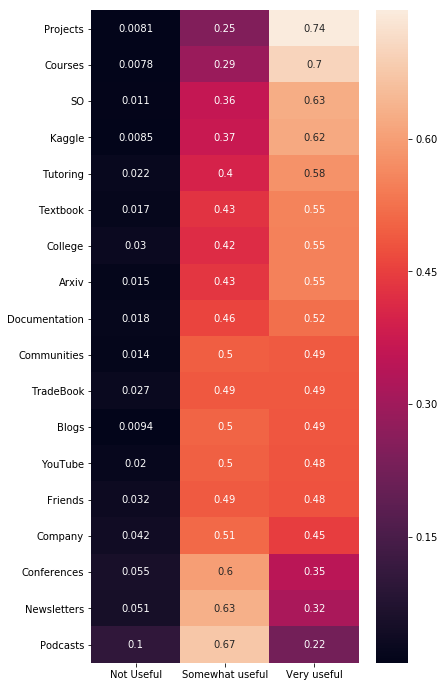

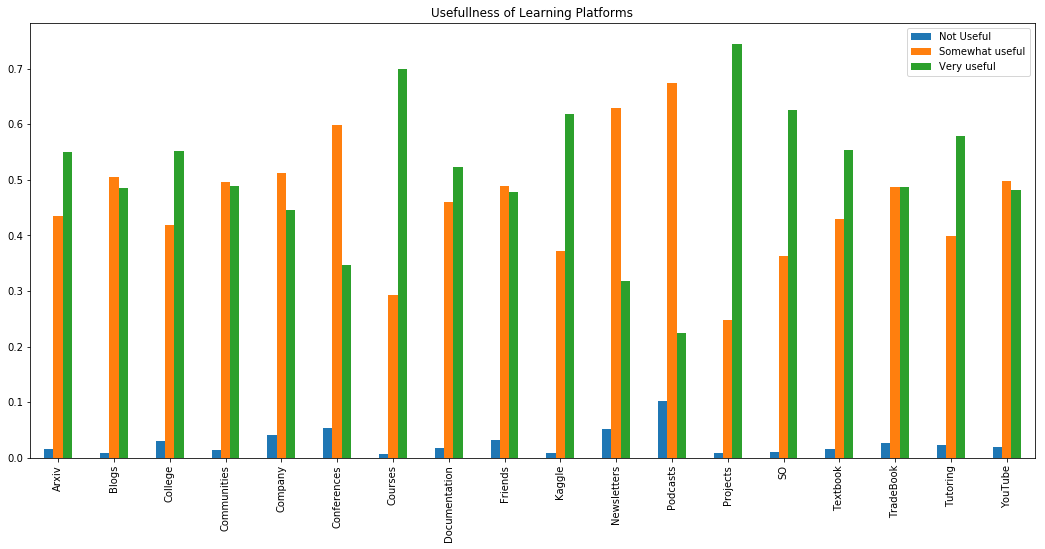

In [22]:
#Construct a Pandas DataFrame to illustrate the usefulness of various learning platforms.
fdf = {}
for feature in use_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]] = a

fdf = pd.DataFrame(fdf).transpose()#.sort_values('Very useful', ascending=False)

#Plot a Heatmap of Learning Platform Usefulness
plt.figure(figsize=(6,12))
sns.heatmap(fdf.sort_values("Very useful", ascending=False), annot=True)

#Plot a grouped barplot of Learning Platform Usefulness
fdf.plot(kind='bar', figsize=(18,8), title="Usefullness of Learning Platforms")
plt.show()

"In general, **Projects** are considered to be the most useful learning platform with more than 74.4% of the respondents answering the Project Importance question labelling it as *Very Useful*. Less than 1% of the respondents deemed Projects to be not useful at all.

Podcasts had the most mixes response with 10% suggesting they were not useful at all and the majority (65%) thinking of them to be somewhat useful.

In [14]:
cat_features = [x for x in mcq.columns 
                if x.find('LearningCategory') != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

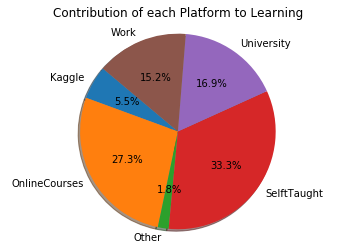

In [13]:
cdf = {}
for feature in cat_features:
    cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()

cdf = pd.Series(cdf)

#Plot a Pie Chart of the contribution of each platform to learning
plt.pie(cdf, labels=cdf.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()

Our respondents attribute most of their learning to **Self Teaching** and **Online Courses**. Together, they account for more than 60% of a person's learning. The contribution of University is surprisingly low considering that most of our respondents hold a Masters or a Doctoral Degree.

#### General Verdict

Online Courses, Stack Overflow and Kaggle are the most popular Learning Platforms for Data Science. The most potent way to learn Data Science is through **personal projects**. You indeed learn the most by doing. Although a degree maybe important in finding a job, it contributes surprisingly little to your learning as compared to Self Teaching.

### Q4. Do I need an extremely powerful computer to do Data Science?

One very common question about Data Science is the amount of computing power usually required to perform DS Tasks. There is a very common misconception that DS Projects require super powerful computers with large amounts of RAM and Disk Space. While this may be the case for industrial level Deep Learning, an ordinary personal computer suffices for most cases.

Let us have a look at what our respondents have to say about this.

In [25]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()]['HardwarePersonalProjectsSelect'].shape

(4206,)

In [26]:
mcq['HardwarePersonalProjectsSelect'] = mcq['HardwarePersonalProjectsSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x: pd.Series(x['HardwarePersonalProjectsSelect']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'

In [27]:
s[s != 'nan'].value_counts()

Basic laptop (Macbook)                                  2246
 GCE ...)                                                669
Laptop + Cloud service (AWS                              669
 Azure                                                   669
Gaming Laptop (Laptop + CUDA capable GPU)                641
Traditional Workstation                                  527
Laptop or Workstation and local IT supported servers     445
GPU accelerated Workstation                              416
Workstation + Cloud service                              174
Other                                                    147
Name: hardware, dtype: int64

Most of our respondents who answered this question have stated that they use a **Basic Laptop** for their personal projects. 

#### General Verdict

For personal projects, don't spend too much time thinking about hardware. For almost all cases, a basic laptop such as a Macbook will suffice.

### Q5. How much time should I spend studying Data Science?

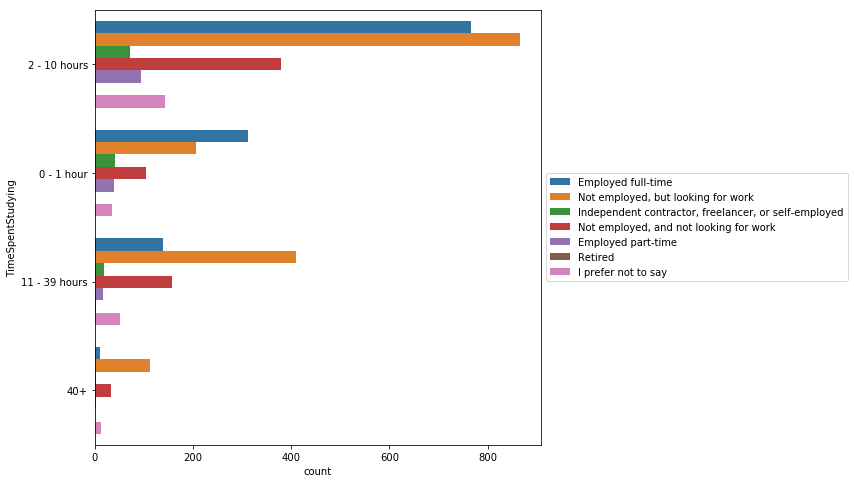

In [28]:
plt.figure(figsize=(8,8))
sns.countplot(y='TimeSpentStudying', data=mcq, hue='EmploymentStatus').legend(loc='center left', bbox_to_anchor=(1, 0.5))

An interesting observation is that **Unemployed people** form the majority of the group answering this question despite being the minority in the overall population. This group typically should contain students still in college or graduate school.

Most of them tend to study more than 2 hours every week. A considerable fraction of the unemployed put in more than 10 hours of work into learning Data Science.

#### General Verdict

In this case, it is really hard to say. In general, you should put in more effort if you're unemployed as compared to when you're in a full time job.

### Q6. Can you recommend some blogs, podcasts, courses, etc. that I can follow?

In [29]:
mcq['BlogsPodcastsNewslettersSelect'] = mcq['BlogsPodcastsNewslettersSelect'].astype('str').apply(lambda x: x.split(','))

In [30]:
s = mcq.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platforms'

In [31]:
s = s[s != 'nan'].value_counts()

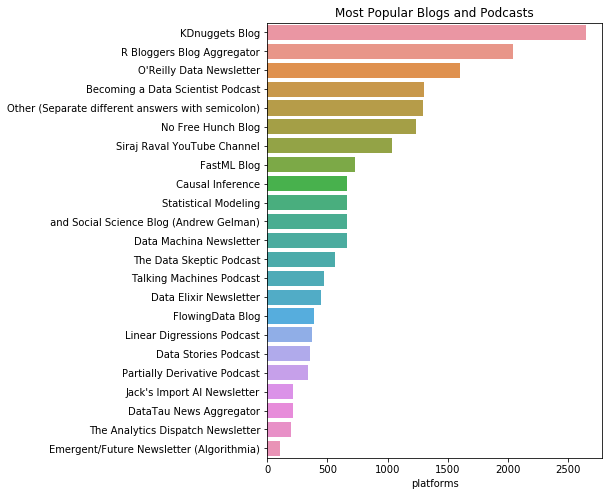

In [32]:
plt.figure(figsize=(6,8))
plt.title("Most Popular Blogs and Podcasts")
sns.barplot(y=s.index, x=s)

**KDNuggets Blog**, **R Bloggers Blog Aggregator** and **O'Reilly Data Newsletter** are the most popular blogs and podcasts among our respondents. It must be mentioned that most of the other entries in the list are also really good resources for learning data science.

In [33]:
mcq['CoursePlatformSelect'] = mcq['CoursePlatformSelect'].astype('str').apply(lambda x: x.split(','))

In [34]:
t = mcq.apply(lambda x: pd.Series(x['CoursePlatformSelect']),axis=1).stack().reset_index(level=1, drop=True)
t.name = 'courses'

In [35]:
t = t[t != 'nan'].value_counts()

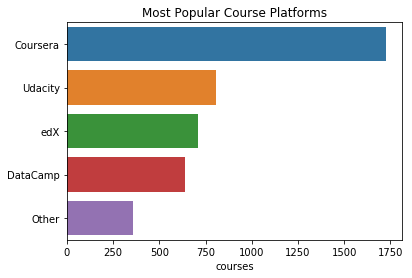

In [36]:
plt.title("Most Popular Course Platforms")
sns.barplot(y=t.index, x=t)

#### General Verdict

The **KDNuggets** blog is extremely popular and recommended by our respondents. **Coursera** is the most popular platform for online courses to learn Data Science.

### Q7. What skills are most important in Data Science Jobs?

Is it absolutely necessary to have a particular skill for various Data Science jobs? Let us find out from people who are employed as Data Scientists in various kinds of companies and industries.

In [37]:
job_features = [x for x in mcq.columns if x.find('JobSkillImportance') != -1 and x.find('JobSkillImportanceOther') == -1]

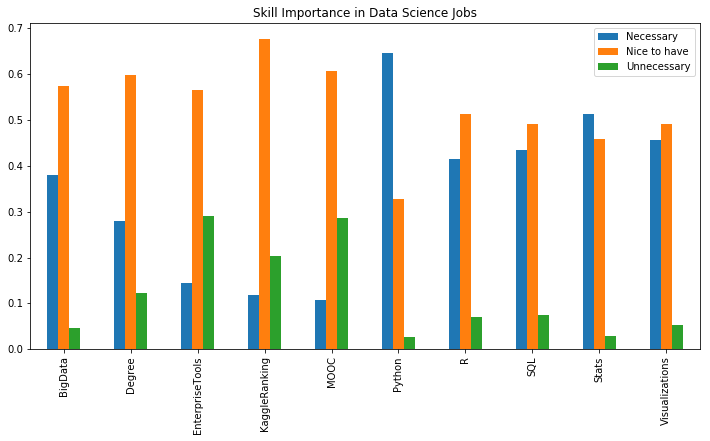

In [38]:
#Get a Pandas DataFrame of Skill Importance of Data Science Jobs
jdf = {}
for feature in job_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jdf[feature[len('JobSkillImportance'):]] = a
#fdf = pd.DataFrame(fdf)
jdf = pd.DataFrame(jdf).transpose()

jdf.plot(kind='bar', figsize=(12,6), title="Skill Importance in Data Science Jobs")

#### General Verdict

**Python**, **Stats** and **Visualizations** are amongst the most important skills that a Data Scientist must possess while on the job. **MOOCs** and **Enterprise Tools** are relatvely unncessary in most Data Science Jobs.

### Q8. What is the median salary for a Data Scientist?

Data Scientist has been touted by *Harvard Business Review* as the sexiest job of the 21st century. A part of the reason can be attributed to the lucrative salaries that data scientists command. Data Science is an extremely diverse role requiring a person to be skilled with a variety of fields, techniques and tools (programming, statistics, visualisations, etc.)

In this section, we will look at the median salary of our respondents. This is one place where our figures will be heavily biased by the nationality of our respondent. Although we have data on conversion rates, it isn't really much good in determining the level of pay in a particular country. A $100,000 salary means different things in India and the US.

Therefore, I will write a function that takes in the country as an input and outputs the summary statistics and salart distribution for that nationality. This would give us a far more accurate picture of salaries in various countries.

In [39]:
mcq[mcq['CompensationAmount'].notnull()].shape

(5224, 228)

In [40]:
#Convert all salary values to float. If not possible, convert it to NaN
def clean_salary(x):
    x = x.replace(',', '')
    try:
        return float(x)
    except:
        return np.nan

In [41]:
#Function that outputs salary statistics and plots a salary distribution for that country
def salary_stats(country):
    data = mcq[(mcq['CompensationAmount'].notnull()) & (mcq['Country'] == country) ]
    data['CompensationAmount'] = data['CompensationAmount'].apply(clean_salary)
    print(data[data['CompensationAmount'] < 1e9]['CompensationAmount'].describe())
    sns.distplot(data[data['CompensationAmount'] < 1e9]['CompensationAmount'])

count    5.700000e+02
mean     1.105683e+06
std      1.575944e+06
min      0.000000e+00
25%      1.625000e+05
50%      6.590000e+05
75%      1.600000e+06
max      2.300000e+07
Name: CompensationAmount, dtype: float64


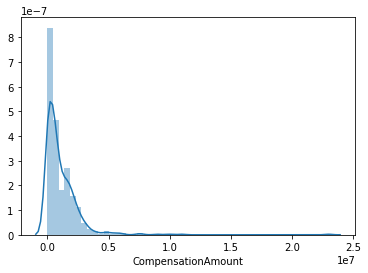

In [42]:
salary_stats('India')

count    1.544000e+03
mean     1.178799e+05
std      9.542697e+04
min      0.000000e+00
25%      7.500000e+04
50%      1.050200e+05
75%      1.452500e+05
max      2.500000e+06
Name: CompensationAmount, dtype: float64


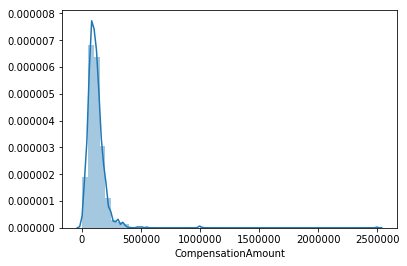

In [43]:
salary_stats('United States')

The median annual salary in **India is Rs. 650,000** (approx \$10,000) whereas that in the **United States is \$105,000 dollars**. Although, by raw conversion rate, it seems that US Data Scientists earn 10 times as much, it is not necessarily the case that they have 10 times more spending power than their Indian counterparts.

### Q9. Where can I get datasets from for my personal and coursework projects?

In [44]:
mcq['PublicDatasetsSelect'] = mcq['PublicDatasetsSelect'].astype('str').apply(lambda x: x.split(','))

In [45]:
q = mcq.apply(lambda x: pd.Series(x['PublicDatasetsSelect']),axis=1).stack().reset_index(level=1, drop=True)
q.name = 'courses'

In [46]:
q = q[q != 'nan'].value_counts()

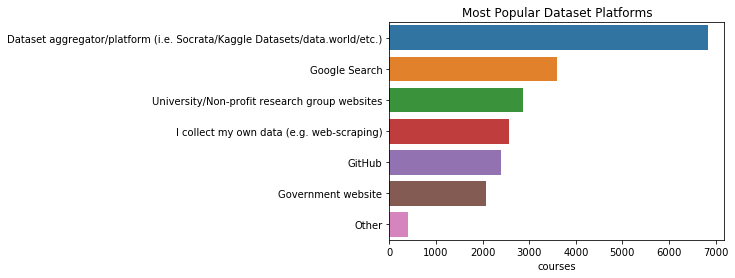

In [47]:
plt.title("Most Popular Dataset Platforms")
sns.barplot(y=q.index, x=q)

#### General Verdict

Dataset Aggregators such as **Kaggle** and **Socrata** are the most popular platforms for people to find datasets for personal projects. Generic Google Searches and University/Non Profit Research Group Websites figure in at second and third respectively.

In [15]:
ff['PersonalProjectsChallengeFreeForm'].value_counts().head(15)

None                     23
Cleaning                 20
Cleaning the data        20
Dirty data               16
Data Cleaning            14
none                     13
Data cleaning            10
dirty data               10
-                         9
Size                      9
Missing data              8
Incomplete data           8
cleaning                  8
Lack of documentation     7
data quality              6
Name: PersonalProjectsChallengeFreeForm, dtype: int64

We also see that unclean data is one of the biggest problems while dealing with datasets. Almost all of the top 15 challenges working with public datasets have to do with data wrangling and cleaning.

### Q10. What does a Data Science Job usually involve?

A very common misconception is that data scientists spend the majority of their time building predictive models and feature engineering. This is untrue for most cases. As we saw in the previous section, cleaning data is one of the biggest challenges when working with public datasets and data scientists spend the major amount of their time cleaning and wrangling data into a form that is suitable for use. 

In [49]:
time_features = [x for x in mcq.columns if x.find('Time') != -1][4:10]

FindingInsights    13.094776
GatheringData      36.144754
ModelBuilding      21.268066
OtherSelect         2.396247
Production         10.806372
Visualizing        13.869372
dtype: float64



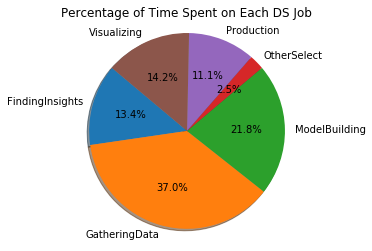

In [50]:
tdf = {}
for feature in time_features:
    tdf[feature[len('Time'):]] = mcq[feature].mean()

tdf = pd.Series(tdf)
print(tdf)
print()

plt.pie(tdf, labels=tdf.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of Time Spent on Each DS Job")
plt.show()

#### General Verdict

More than one-third of the time is spent on **Gathering Data** (Data Wrangling and Cleaning). Model Building, arguably the most *glamorous* part of a Data Scientist's job takes up just one fifth of his/her time.

### Q11. What factors should I consider while looking for a Data Science Job?

In [51]:
job_factors = [x for x in mcq.columns if x.find('JobFactor') != -1]

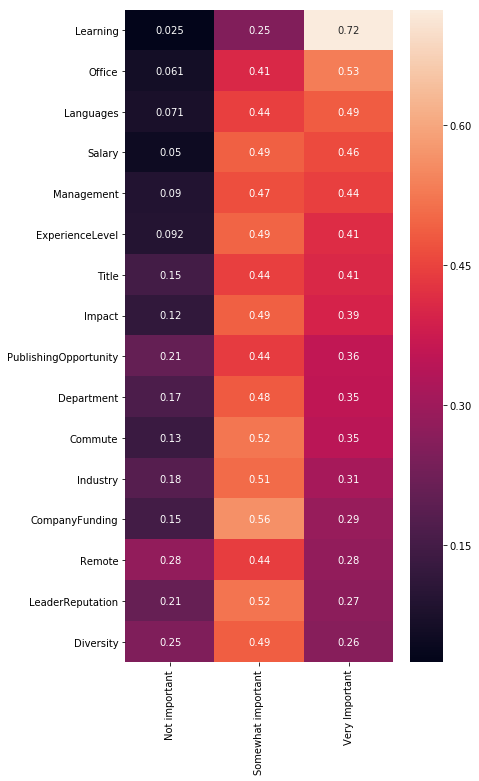

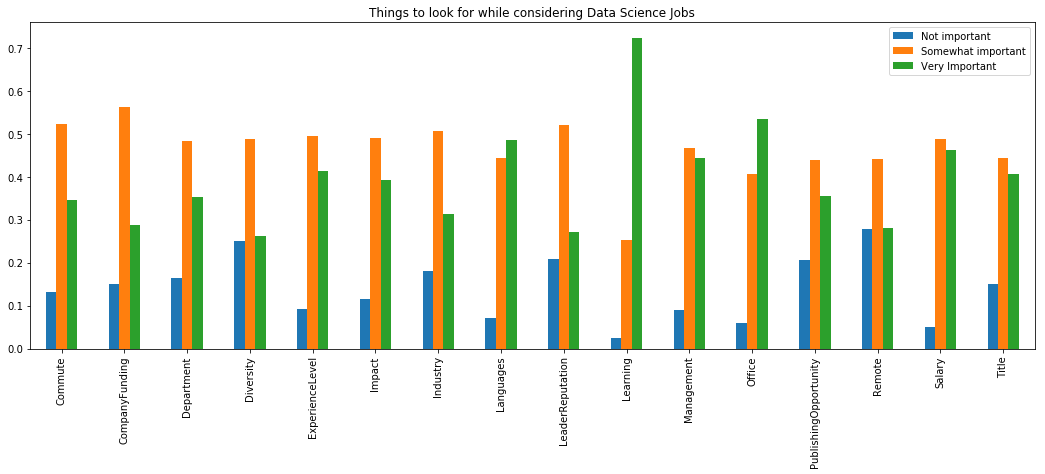

In [52]:
jfdf = {}
for feature in job_factors:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jfdf[feature[len('JobFactor'):]] = a

jfdf = pd.DataFrame(jfdf).transpose()

plt.figure(figsize=(6,12))
sns.heatmap(jfdf.sort_values('Very Important', ascending=False), annot=True)

jfdf.plot(kind='bar', figsize=(18,6), title="Things to look for while considering Data Science Jobs")
plt.show()

#### General Verdict

**Learning Opportunities** is the biggest factor that our respondents consider while applying for Data Science Jobs. Office, Leanguages Used, Salary and Management are the other important factors to consider while looking for a job.

### Q12. How important is a degree to be successful in Data Science?

With the plethora of free resources and professional online certifications available online, a question most of us have in our mind is how important it is to get a relevant University degree in order to train ourselves in the field. Let us find out!

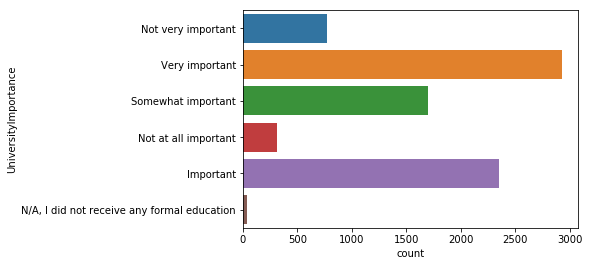

In [53]:
sns.countplot(y='UniversityImportance', data=mcq)

One of our commentors, [Shawn Hansen](https://www.kaggle.com/shawnhansen), suggested that University Importance tends to decline with age as people tend to accumulate more work experience. Let us check if that is indeed the case.

In [54]:
top_uni = mcq['UniversityImportance'].value_counts().head(5)
top_uni_dist = []
for uni in top_uni.index:
    top_uni_dist.append(mcq[(mcq['Age'].notnull()) & (mcq['UniversityImportance'] == uni)]['Age'])

group_labels = top_uni.index

fig = fig_fact.create_distplot(top_uni_dist, group_labels, show_hist=False)
py.iplot(fig, filename='University Importance by Age')

We see that the age distributions for people attributing various levels of importance to university tends to more or less overlap. However, people stating that universities were not at all important tend to be very slightly older. As Shawn had stated, this could be due to more work experience downplaying the importance of the degree.

#### General Verdict

Most of our respondents place a high amount of importance to University Degrees with the plurality declaring it as *Very Important*. Less than 300 people actually thought that University was not important at all.

This result is not at all surprising considering the fact that most of respondents have attended graduate schools and hold Masters and Doctoral Degrees.

### Q13. Where do I start learning Data Science?

In the previous few sections, we have highlighted the various platforms and ways that our respondents learn data science. But is there any particular platform that is especially popular with beginners?

In [55]:
mcq[mcq['FirstTrainingSelect'].notnull()].shape

(14712, 228)

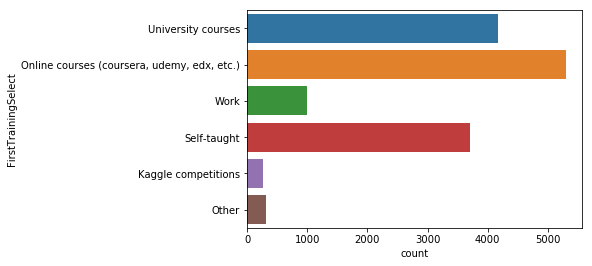

In [56]:
sns.countplot(y='FirstTrainingSelect', data=mcq)

#### General Verdict

Surprisingly, although most of our population have bachelors and higher degrees and have attributed a large amount of importance to university education, the plurality of our respondents started their Data Science journey with **Online Courses** and **Self Learning**. University courses came in second.

It seems to me that Online Learning does play a considerable role in getting people interested and started with Data Science.

### Q14. What are the most important things to have on a Data Science resume?

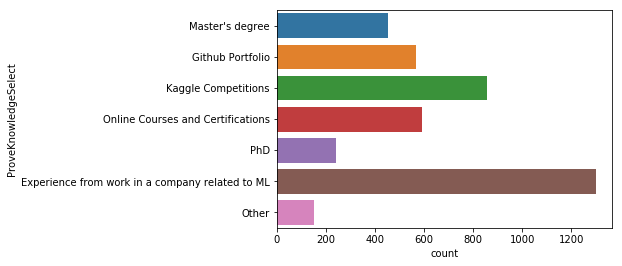

In [57]:
sns.countplot(y='ProveKnowledgeSelect', data=mcq)

#### General Verdict

According to our respondents, **Work Experience** in the field is the most important indicator of a person's expertise in Data Science. **Kaggle Competitions** results come in second. Interestingly, our respondents place a high value on Online Courses and Certifications although their presence and potence in a resume is still hotly debated.

### Q15. Do I need to know the Math behind the ML Algorithms I use?

Most ML Algorithms tend to have a fairly good amount of math (especially linear algebra). However, libraries such as scikit learn abstract away all these details from us and make it incredibly simply to train ML Models without knowing the underlying techniques. But is it important to know them nonetheless?

In [58]:
mcq[mcq['AlgorithmUnderstandingLevel'].notnull()].shape

(7410, 228)

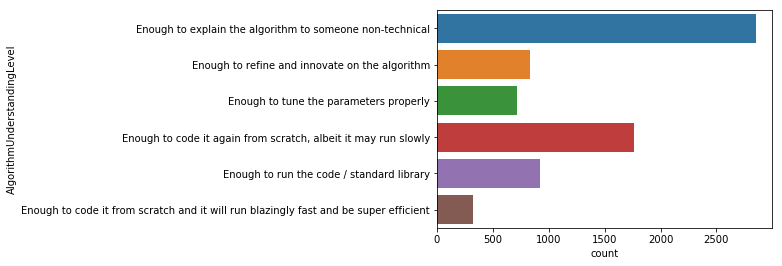

In [59]:
sns.countplot(y='AlgorithmUnderstandingLevel', data=mcq)

#### General Verdict

From the responses gathered in the survey, it seems like the majority of our respondents have a fairly good understanding of the math behind the algorithms (enough to explain it to a non technical person). Less than a 1000 people (or 15%) knew just enough to run an ML standard library.

Since most of the people in our population are employed, it would be good advice to encourage people to learn the math.

### Q16. Where should I look for a job?

To answer this question, we will look at two features: where fully employed people got their current jobs and where the job seekers amongst our respondents are looking for data science jobs.

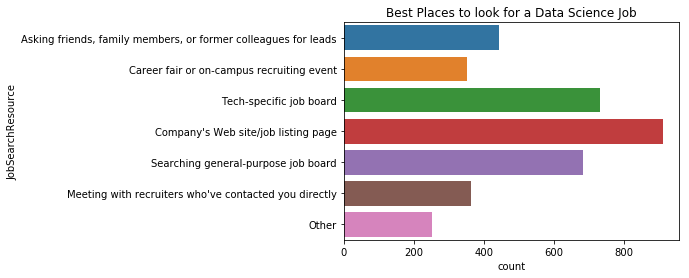

In [60]:
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=mcq)

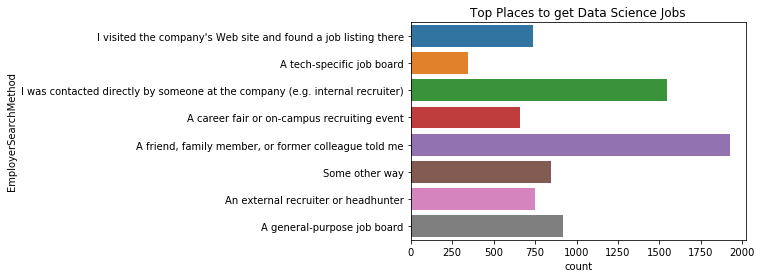

In [61]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=mcq)

#### General Verdict

A **Company's Website** is the most popular place for job seekers to look for a Data Science Jobs. **Job Boards** are the second most popular place where people look for jobs.

However, these results do not align well with what fully employed people have to say about how they got their jobs. Company Websites and Tech Specific Job Boards account for very few job conversions. It seems that **Networking** is the most powerful tool to get a data science job. Having a very vibrant presence online also helps as it makes you more visible to **Internal Recruiters**, the second most successful Employer Search Method..

## Conclusion

I will stop my analysis here. There are of course, many more questions that can be answered using this data. If there is any question you'd like answered, feel free to drop them in the comments. All other suggestions and improvements are welcome too. Thank you for reading! :)